**Nombre: Arturo Garza Campuzano**

**Matrícula: A00828096**

# Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

El propósito de esta evidencia es implementar técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos sobre la siguiente **problemática**:

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

- Qué variables son significativas para predecir el precio de un automóvil
- Qué tan bien describen esas variables el precio de un automóvil

Con base a varias encuestas de mercado, la consultoría ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en el mercado estadounidense que que presenta en el siguiente [archivo](https://drive.google.com/file/d/1DaBIsDev8n-KfXebZfUzvQHxej2v92Ku/view?usp=sharing). Las variables recopiladas vienen descritas en el [diccionario de términos](https://docs.google.com/spreadsheets/d/1o9q3gkz2YG3qWDzxE1o-kYZ2WNzT7p2x/edit?usp=sharing&ouid=116463518778455443870&rtpof=true&sd=true).

## Importar módulos

In [52]:
# Importación de librerías
import pandas as pd
import numpy as np
import random as rnd
import math
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

## Cargar datos

In [53]:
# Este bloque de codigo no es necesario si el archivo esta guardado localmente
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Dataframe del conjunto de datos
autos_df = pd.read_csv('/content/drive/MyDrive/TC3006C101_A00828096/Estadistica/precios_autos.csv')
autos_df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


## **1. Exploración de la base de datos**

### 1.1 Cálculo de mediads estadísticas

#### 1.1.1 Variables cuantitativas

Considerando la descripción de las variables proporcionada por el diccionario de términos y los valores de las variables se puede contemplar que las siguientes **variables** son **cuantitativas**: wheelbase, carlength, carwidth, carheight, curbweight, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg y price.

Utilizando la función **describe()** se obtienen, por cada una de estas variables, los siguientes datos: cantidad de registros, media, desviación estándar, cuantiles, mínimo y máximo valor.

Cabe mencionar que la variable **symboling** no se toma en cuenta como variable cuantitativa aunque tenga valores numéricos, ya que es catalogada en el diccionario como **variable categórica**.

Estas vairables se guardan en un dataframe llamado **variables_cuantitativas** para facilitar su manipulación.

In [55]:
# Seleccionar las variables tipo number del dataframe original
variables_cuantitativas = autos_df.select_dtypes(include=['number'])
variables_cuantitativas.drop(columns=['symboling'], inplace=True)
variables_cuantitativas.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Observaciones:**
- Todas las variables cuentan con la misma cantidad de valores.
- Hay diversidad en rangos de valores para cada variable.

#### 1.1.2 Variables cualitativas

Tomando, otra vez, como referencia el diccionario de términos se puede contemplar que las siguientes **variables** son **categóricas**: symboling, CarName, fueltype, carbody, drivewheel, enginelocation, enginetype y cylindernumber.

Utilizando la función **describe(include=['O'])** se obtienen, por cada una de estas variables, los siguientes datos: cantidad de registros, cantidad de valores únicos, primer valor y su respectiva frecuencia. Estos mismos datos se obtienen para la variable **symboling** de otra forma, debido a que pandas reconoce la variable como númerica y no categórica.

Estas variables se guardan en un dataframe llamado **variables_cualitativas** para facilitar su manipulación. **Symboling** se agrega después de la transformación.

In [56]:
# Seleccionar las variables tipo object del dataframe original
variables_cualitativas = autos_df.select_dtypes(include=['object'])
# Crea un data frame para visualizar la descripcion por variable
vcual_df = variables_cualitativas.describe(include=['O'])

# Obtiene los datos para la variable symboling
symboling_count = autos_df['symboling'].count()
symboling_unique = autos_df['symboling'].nunique()
symboling_top = autos_df['symboling'][0]
symboling_freq = autos_df['symboling'].value_counts()[symboling_top]

# Elimina la variable CarName
variables_cualitativas.drop(columns=['CarName'], inplace=True)

# Agrega la variable symboling con sus correspondientes datos
vcual_df['symboling'] = [symboling_count, symboling_unique, symboling_top, symboling_freq]
vcual_df

,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,symboling
count,205,205,205,205,205,205,205,205
unique,147,2,5,3,2,7,7,6
top,toyota corona,gas,sedan,fwd,front,ohc,four,3
freq,6,185,96,120,202,148,159,27


**Observaciones:**
- Todas las variables cuentan con la misma cantidad de valores.
- La variable CarName es la única que cuenta con muchos valores únicos (71.70%).
- La mayoría de los carros utilizan gasolina (90.24%).
- El 46.83% de los carros son de tipo sedan.
- La mayoría de los motores se encuentran al frente del carro (98.54%).
- La mayoría de los carros tienen un motor tipo ohc (72.20%).
- La mayoría de los carros tienen cuatros cilindros (77.56%).




### 1.2 Exploración de datos usando herramientas de visualización

#### 1.2.1 Vairbales cuantitativas

##### 1.2.1.1 Medidas de posición

Por cada variable cuantitativa se obtienen los cartiles y se identifican sus datos atípicos correspondientes.

In [57]:
# Calcula los cuartiles (25%, 50% y 75%)
cuartiles = variables_cuantitativas.quantile([0.25, 0.5, 0.75])

# Calcula el rango intercuartilico (IQR)
iqr = cuartiles.loc[0.75] - cuartiles.loc[0.25]

# Define los límites para detectar valores atípicos (outliers)
lower_bound = cuartiles.loc[0.25] - 1.5 * iqr
upper_bound = cuartiles.loc[0.75] + 1.5 * iqr

# Identifica los valores atípicos
outliers = ((variables_cuantitativas < lower_bound) | (variables_cuantitativas > upper_bound))

# Calcula la cantidad de valores atípicos por columna
outliers_count = outliers.sum()
outliers_count

wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
price               15
dtype: int64

**Observaciones:**
- La variable con más datos atipicos es **compressionratio** (13.66%).
- Bajo la consideración de que se eliminar los datos atípicos:
  - En el peor de los casos, se estaría eliminando el 47.80% de los datos
  - En el mejor de los casos, se estaría eliminando el 13.66% de los datos.
- Las variables **carheight** y **curbweight** son las únicas variables que no cuentan con datos atípicos.

Se presentan los diagramas de caja y bigotes, por cada variable, para una mejor visualización de estos datos atípicos.

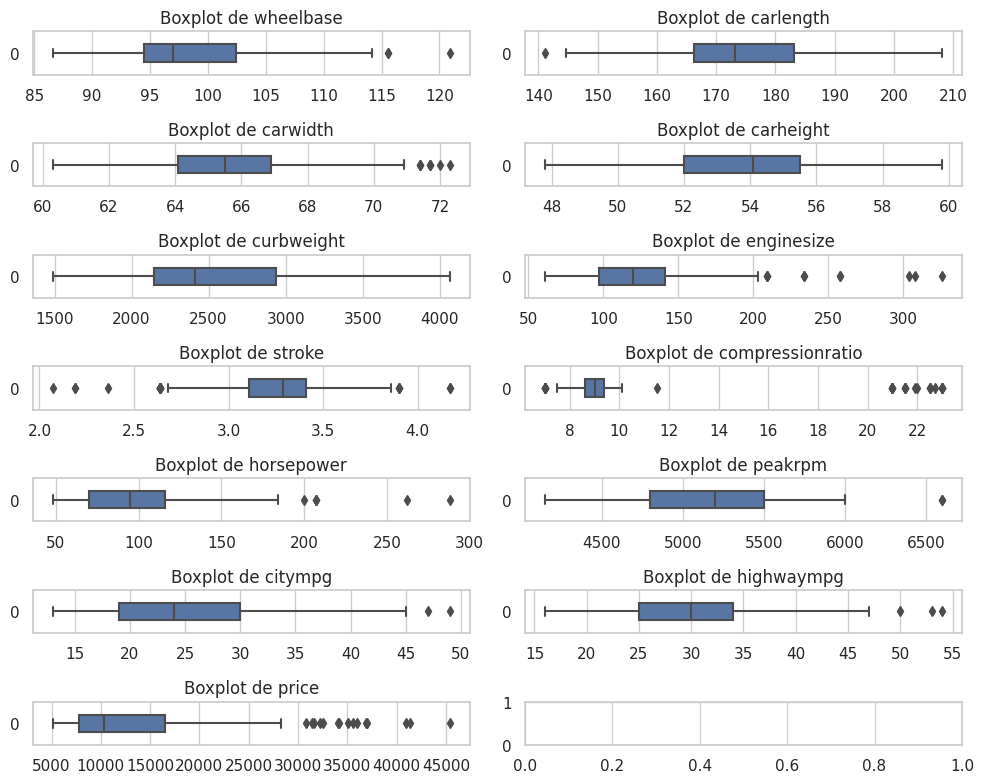

In [58]:
# Crear una figura y matriz de subtramas
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 8))

# Iterar sobre las subtramas y las columnas
for ax, column in zip(axes.flatten(), variables_cuantitativas):
    sns.boxplot(data=autos_df[column], orient="h", width=0.4, ax=ax)
    ax.set_title(f"Boxplot de {column}")

# Ajustar diseño de subtramas y mostrar figura
plt.tight_layout()
plt.show()

**¿Qué hacer con los datos atípicos identificados?** Por el momento no se eliminará ningún registro, siguiendo la máxima de eliminar los datos atípicos después de construir y probar el modelo.

##### 1.2.1.2 Análisis de distribución de los datos

Con el objetivo de analizar la distribución de las variables cuantitativas se crean histogramas para cada una y se calculan el sesgo y la curtosis. A continuación se presentan los histogramas por variable.


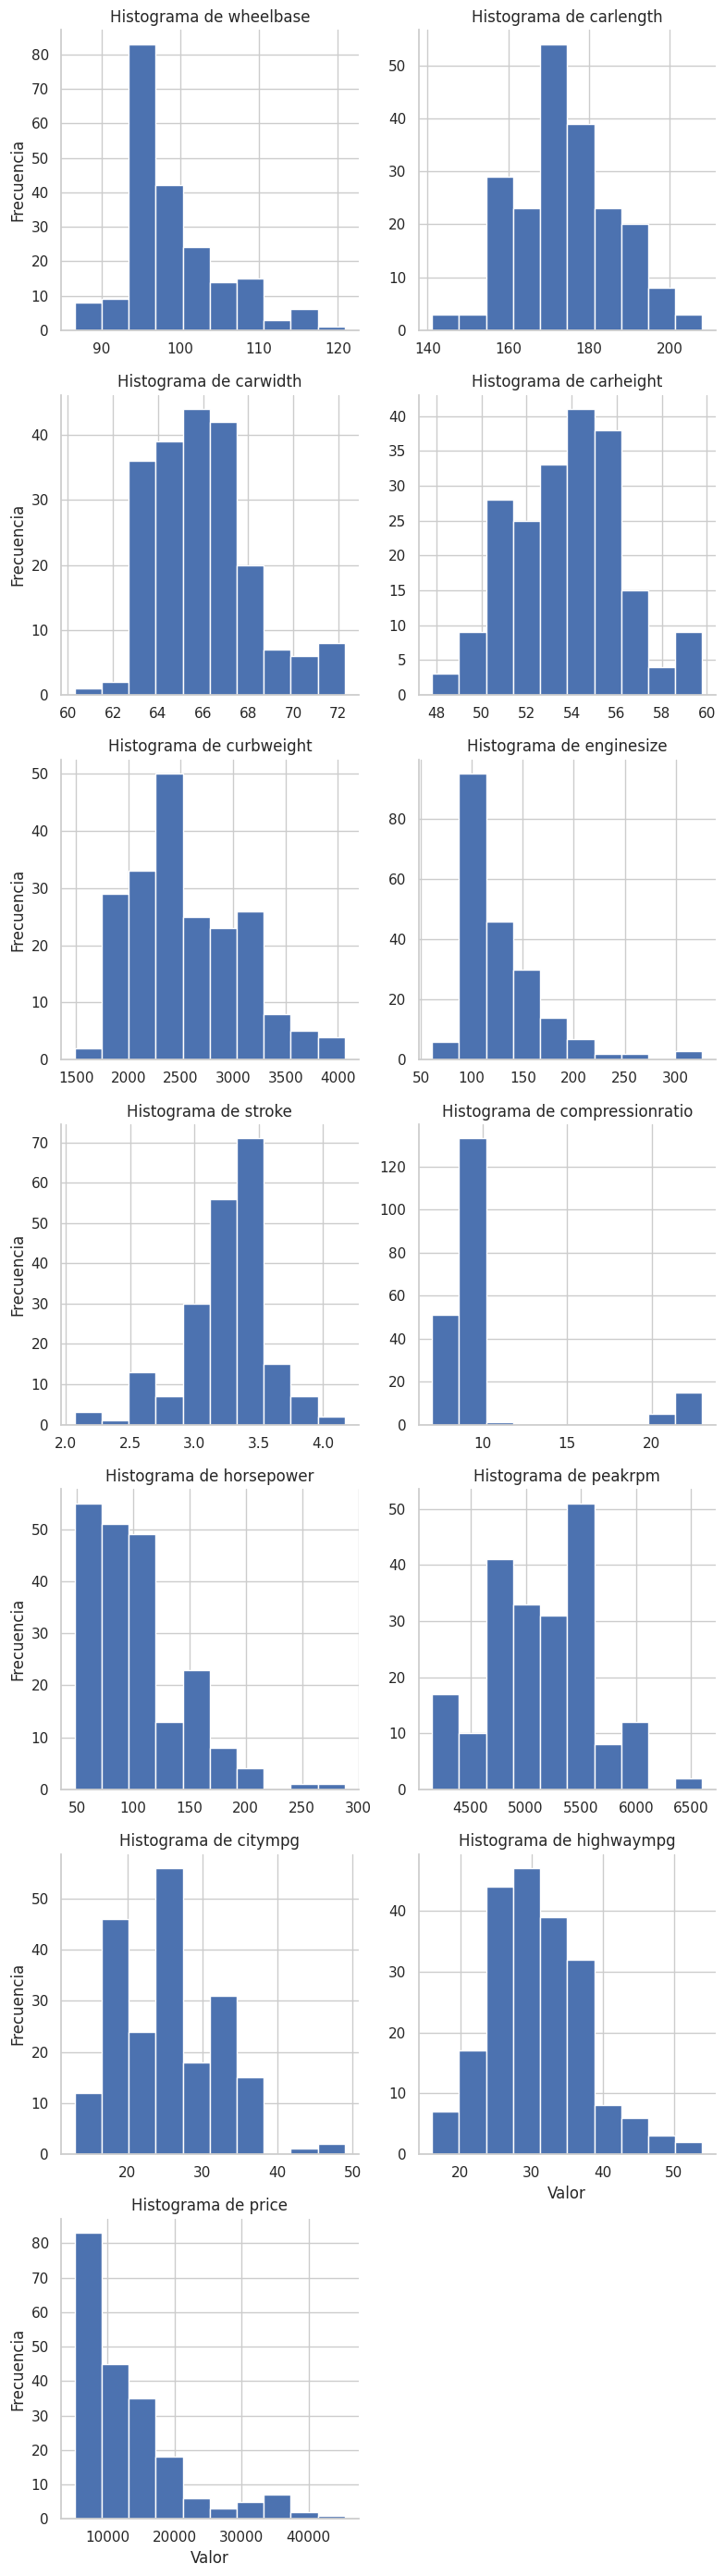

In [59]:
# Crear un FacetGrid para histogramas
g = sns.FacetGrid(variables_cuantitativas.melt(), col="variable", col_wrap=2, sharex=False, sharey=False, height=4)

# Map histograms to the FacetGrid
# Mapear histogramas al FacetGrid
g.map(plt.hist, "value", bins=10)
g.set_titles(col_template="Histograma de {col_name}")
g.set_axis_labels("Valor", "Frecuencia")

# Ajustar layout y mostrar gráficas
plt.tight_layout()
plt.show()

**Observaciones:**
- Parece ser que las variables que siguen una **distribución simétrica** son: carlenght, carwidth, carheight, stroke, peakrpm, citympg, highwaympg. Por otro lado, el resto de las variables parece ser que siguen una **distribución asimétrica**.
- Las variables **price**, **horsepower**, **enginesize** y **wheelbase** tienen sus valores agrupados a la izquierda.
- En la distribución de la variable **compressionratio** los valores se concentran en las colas.

Para corroborar algunas de estas observaciones se calculan el sesgo y la curtosis para cada variable.

In [60]:
# Calcular la media, mediana y moda de cada columna
diccionario_resultados = {'Variable': [], 'Sesgo': [], 'Curtosis': []}

for columna in variables_cuantitativas.columns:
    sesgo = skew(variables_cuantitativas[columna])
    curtosis = kurtosis(variables_cuantitativas[columna])

    diccionario_resultados['Variable'].append(columna)
    diccionario_resultados['Sesgo'].append(sesgo)
    diccionario_resultados['Curtosis'].append(curtosis)

# Crear un nuevo DataFrame con los resultados
estadisticas_df = pd.DataFrame(diccionario_resultados)

# Imprimir el nuevo DataFrame
estadisticas_df


,Variable,Sesgo,Curtosis
0,wheelbase,1.042514,0.963276
1,carlength,0.154810,-0.110013
2,carwidth,0.897375,0.656614
3,carheight,0.062660,-0.462188
4,curbweight,0.676402,-0.070942
5,enginesize,1.933375,5.148030
6,stroke,-0.684648,2.092597
7,compressionratio,2.591720,5.077161
8,horsepower,1.395006,2.589862
9,peakrpm,0.074608,0.055528


**Observaciones:**
- Considerando que la **distribución** es **simétrica** cuando el coeficiente de sesgo está entre -0.5 y 0.5, entonces se tiene que las siguientes variables siguen una distribución simétrica: carlength, carheight y peakrpm. El resto de las variables cuentan con una **distribución ásimetrica**. Por lo tanto, algunas de las supociciones realizadas bajo la visualización de las gráficas se descartan.
- Considerando que la forma de la distribución es mesocúrtica cuando el coeficente de curtosis está entre 2.5 y 3.5, entonces se tiene que las siguientes variables siguen una distribución mesocúrtica: horsepower y price. Por otro lado, **enginesize** y **compressionratio** siguen una distribución leptocúrtica. El resto de las variables siguen una distribución platicúrtica.

##### 1.2.1.3 Análisis de colinealidad

Para analizar la colinealidad entre las variables cuantitativas se elabora un mapa de calor en donde se visualiza la correlación entre dichas variables y se visualizan graficas de dispersión por variable.

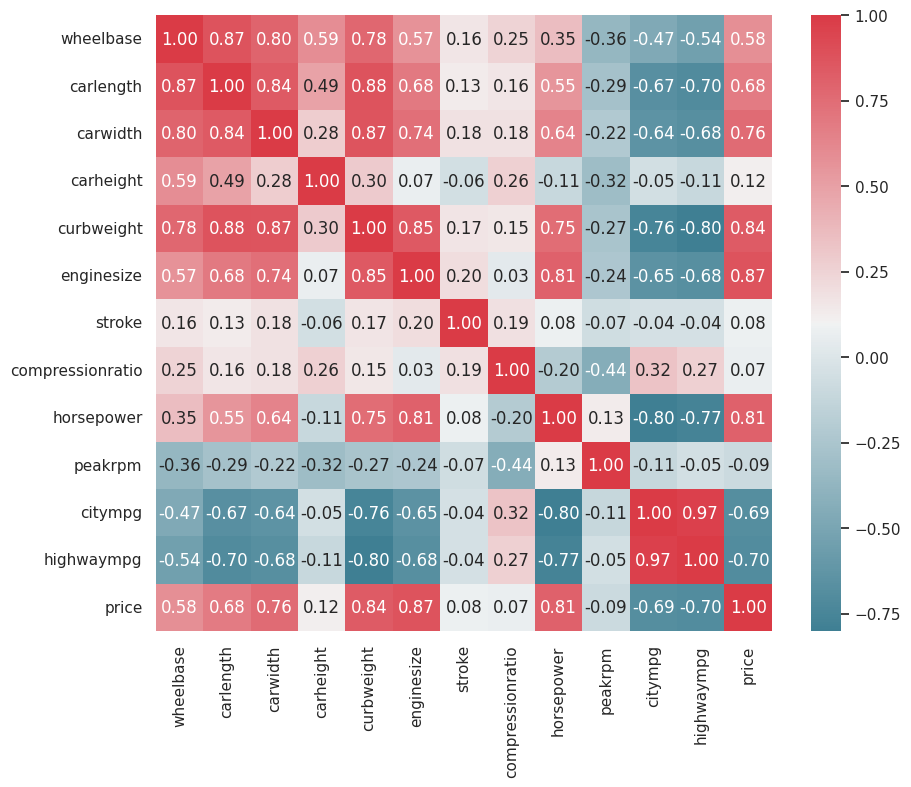

In [61]:
# Coeficiente de correlación
corr_matrix = variables_cuantitativas.corr()

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            mask=np.zeros_like(corr_matrix),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Guardar la matriz de correlación en un archivo CSV
corr_matrix.to_csv('matriz_correlacion.csv')

plt.show()

**Observaciones:**
- Las variables **enginesize**, **curbweight**, **horsepower** tienen una **correlación muy fuerte** con **price**.
- Las variables **carwidth**, **highwaympg**, **citympg**, **carlength**, **wheelbase** tienen una **correlación fuerte** con **price**.
- Las variable **carheight** tiene una **correlación débil** con **price**, el resto de las variables cuentan con una **correlación nula** con la misma variable.

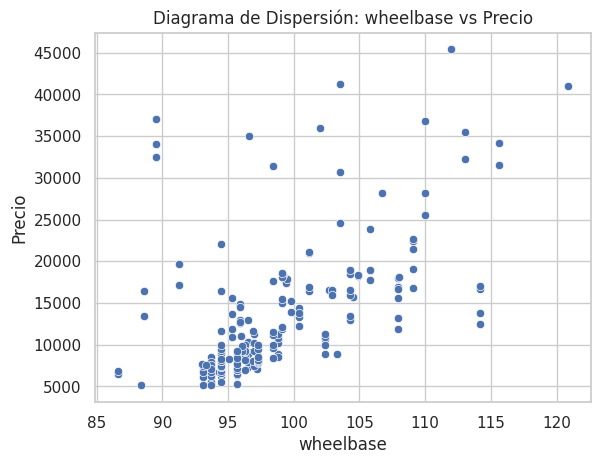

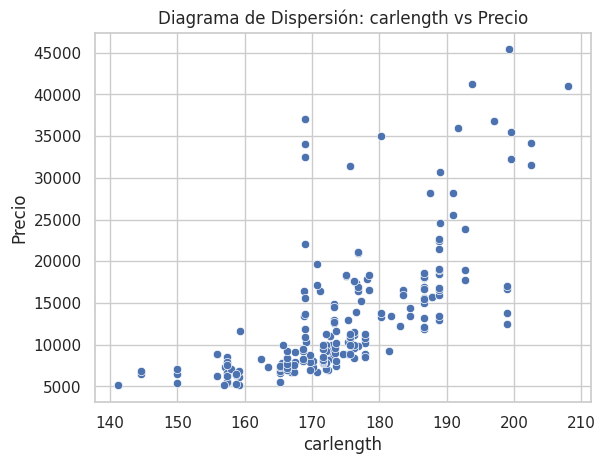

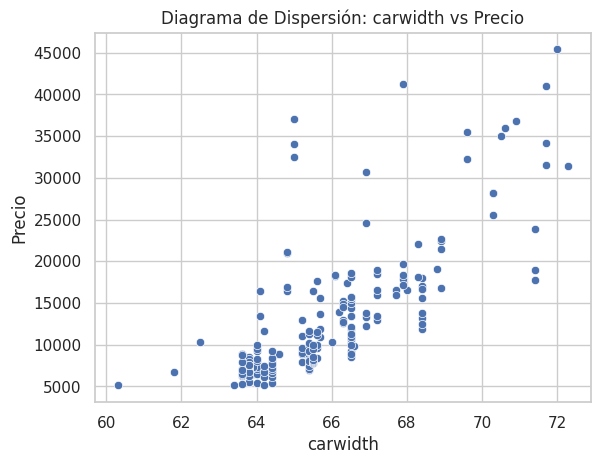

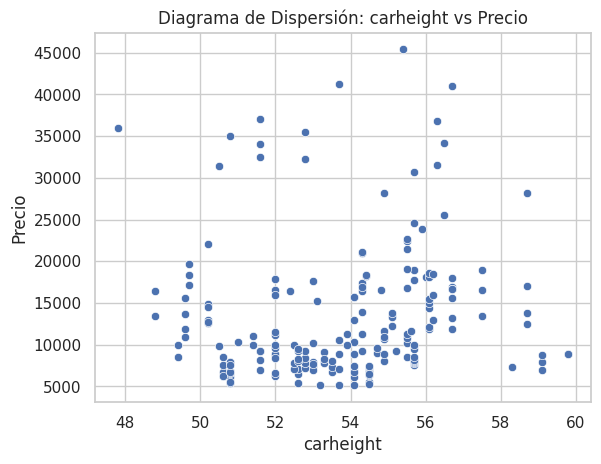

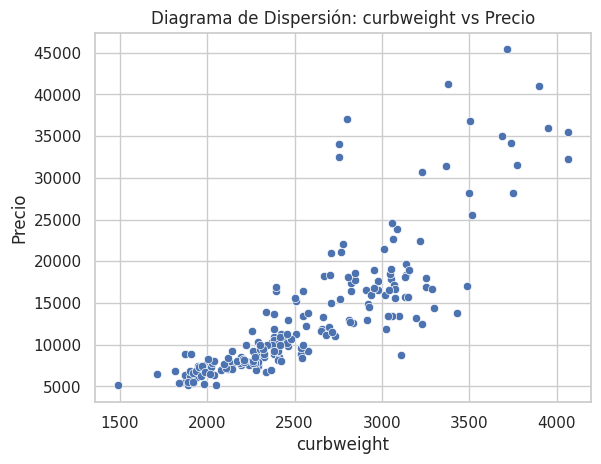

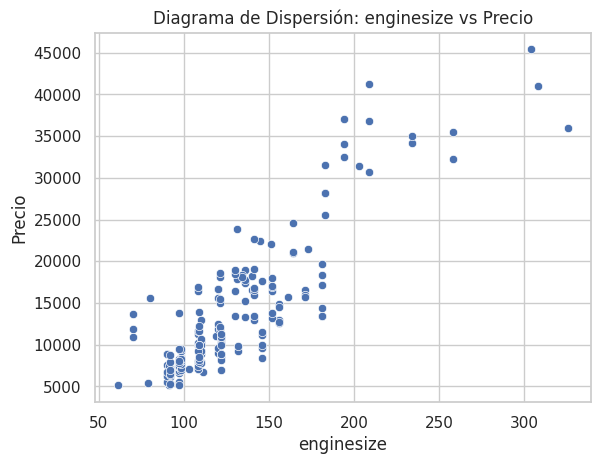

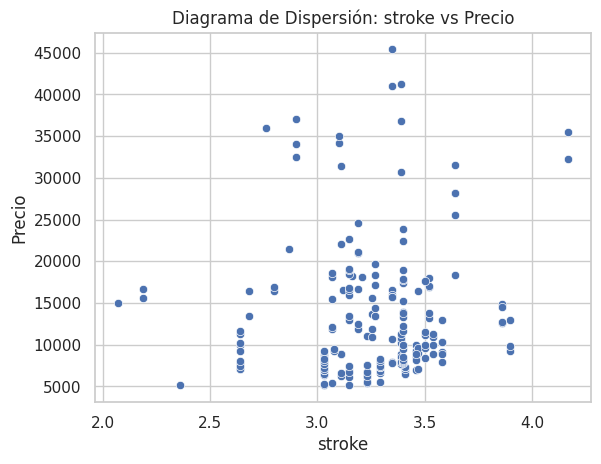

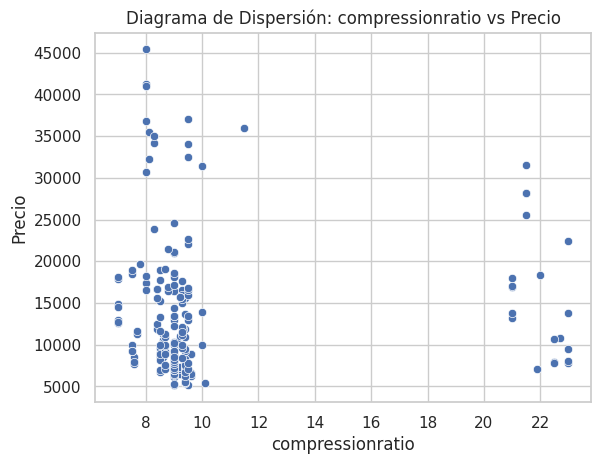

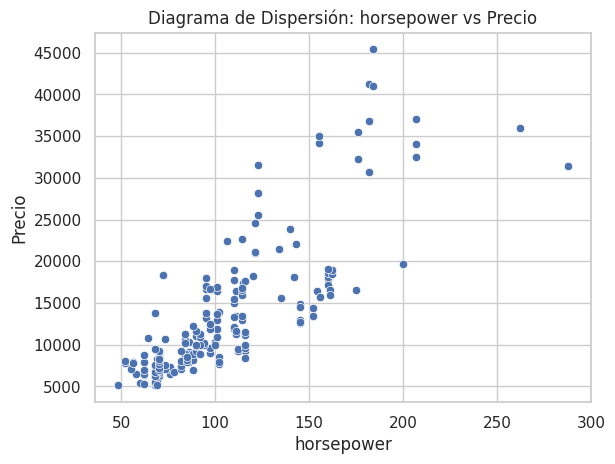

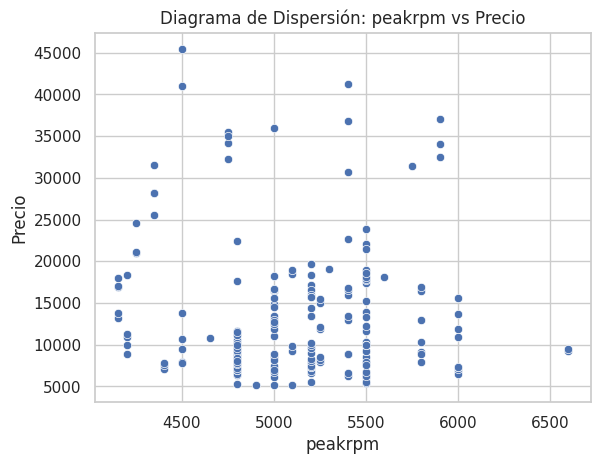

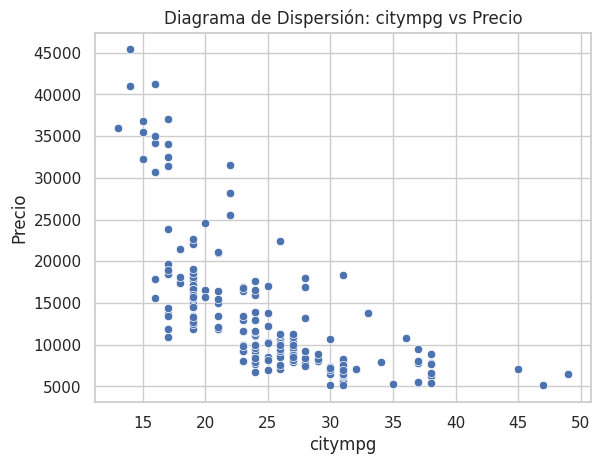

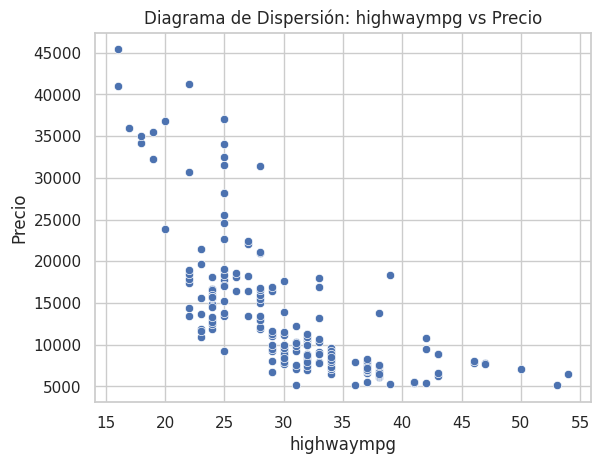

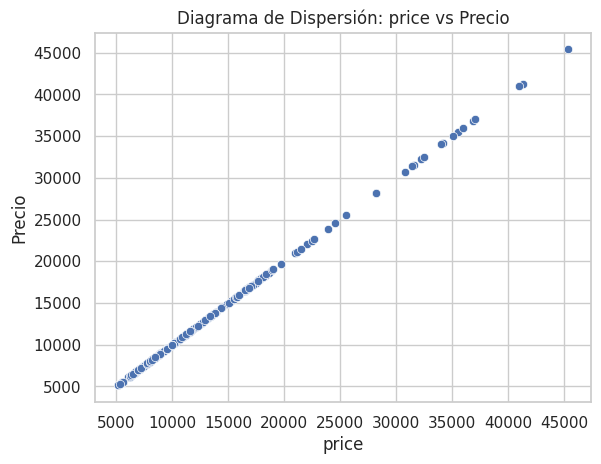

In [62]:
# Diagramas de dispersión
for columna in variables_cuantitativas:
    sns.scatterplot(data=autos_df, x=columna, y='price')
    plt.title(f'Diagrama de Dispersión: {columna} vs Precio')
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.show()

**Observaciones:**
- Los puntos tienden a agruparse en una curva en **carlength**, **curbweight**, **horsepower**, **citympg**, **highwaympg** y **carheight**.
- Los puntos tienden a agruparse en una línea en **carwidth** y **enginesize**.
- Los puntos tienden a agruparse en un grupo disperso en **peakrpm**, **compressionratio**, **stroke** y **wheelbase**.

Estas agrupaciones coinciden con los coeficientes de correlación entre estas variables y **price**.


#### 1.2.2 Variables categóricas

##### 1.2.2.1 Distribución de los datos

Para analizar la distribución de los datos se hace uso de histogramas de frecuencia y gráficas de pastel por cada variable. A continuación se presentan los histogramas de frecuencia.

Por otro lado, también se puede contemplar que hay un desbalance de los valores posibles en las siguientes variables cualitativas: fuletype, enginelocation, enginetype. Para relacionar el valor numérico actual para cada variable con su valor original se presenta un dataframe del mapeo.



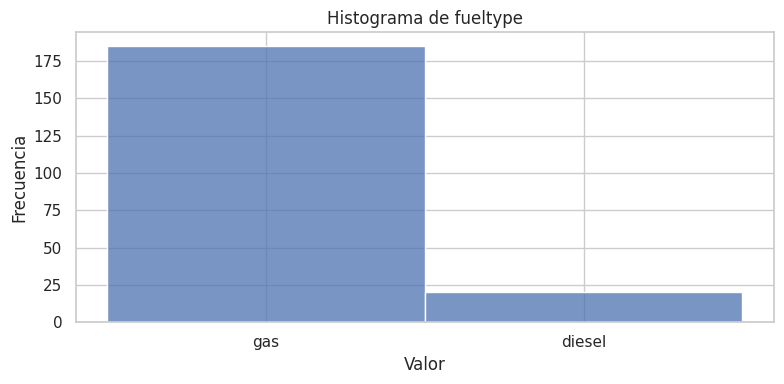

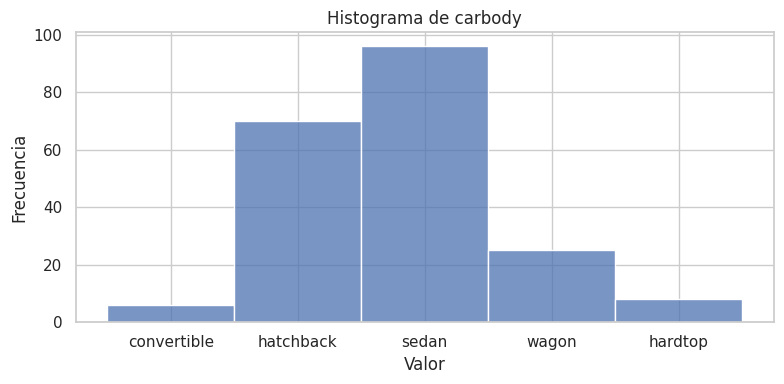

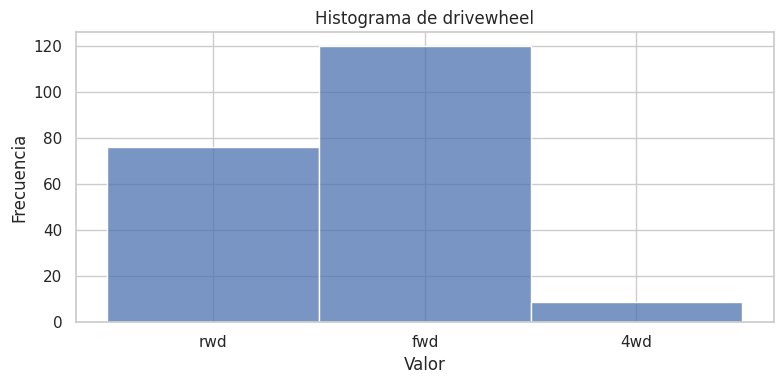

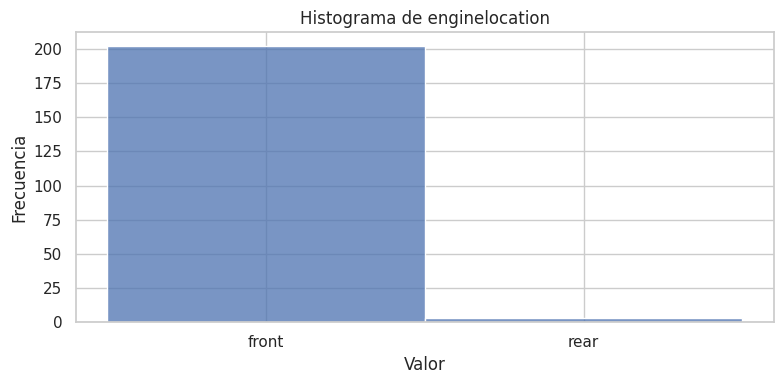

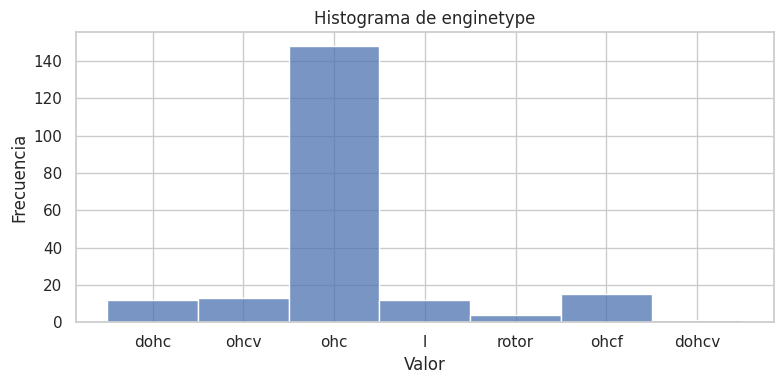

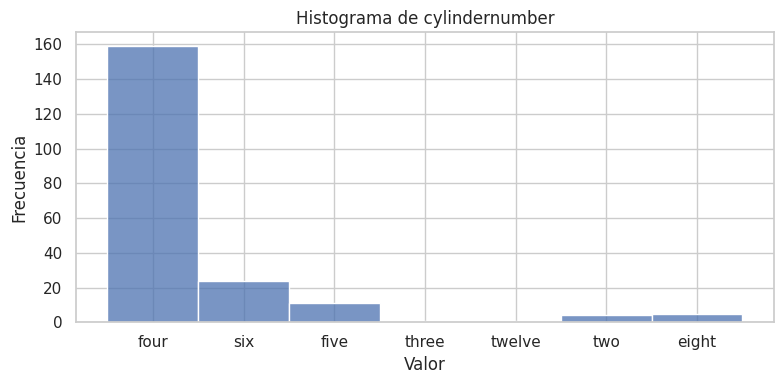

In [63]:
# Itera a través de las columnas cualitativas
for variable in variables_cualitativas.columns:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura según tus preferencias

    # Crea el histograma utilizando Seaborn
    sns.histplot(variables_cualitativas[variable], bins=20)

    # Agrega un título específico para cada gráfico
    plt.title(f'Histograma de {variable}')

    # Etiquetas de ejes
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

    # Ajusta layout y muestra gráficas
    plt.tight_layout()
    plt.show()

**Observaciones:**
- Hay un valor predominante en **fueltype**, **enginelocation**, **enginetype** y **cylindernumber**.
- La variable que se asemeja más a una distribución normal es **carbody**.

Para corroborar la primera observación se elaboran gráficas de pastel para visualizar los procentajes que ocupan los valores en cada variable.

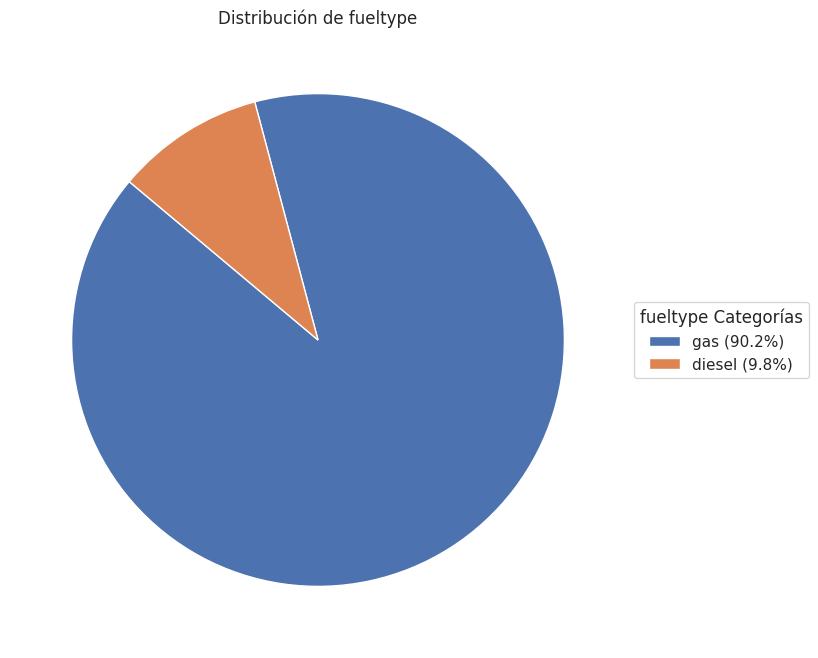

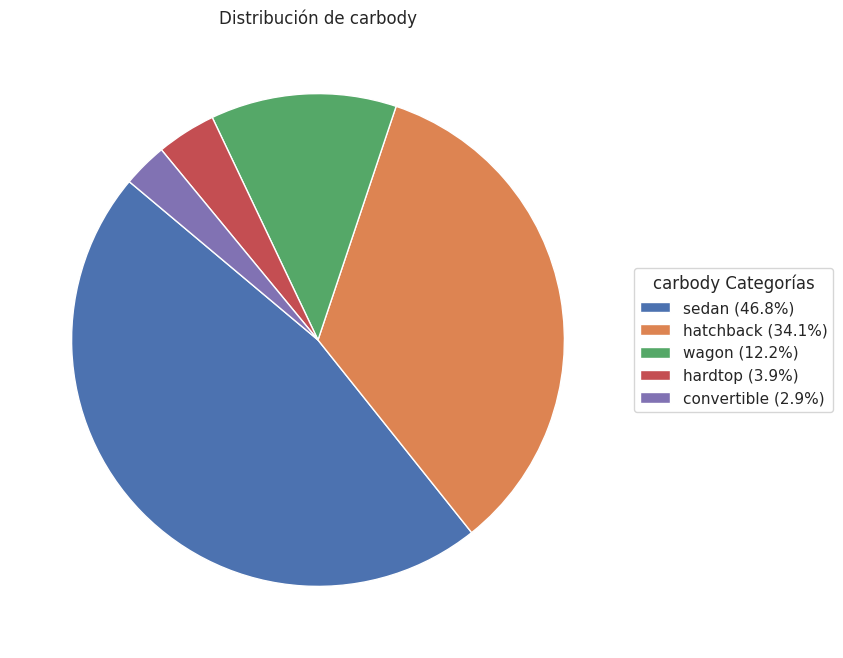

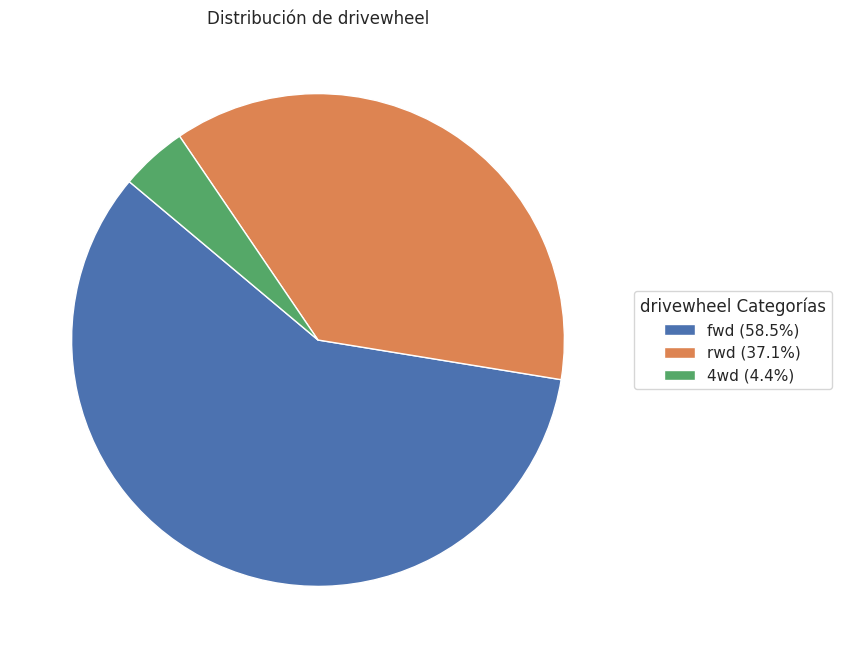

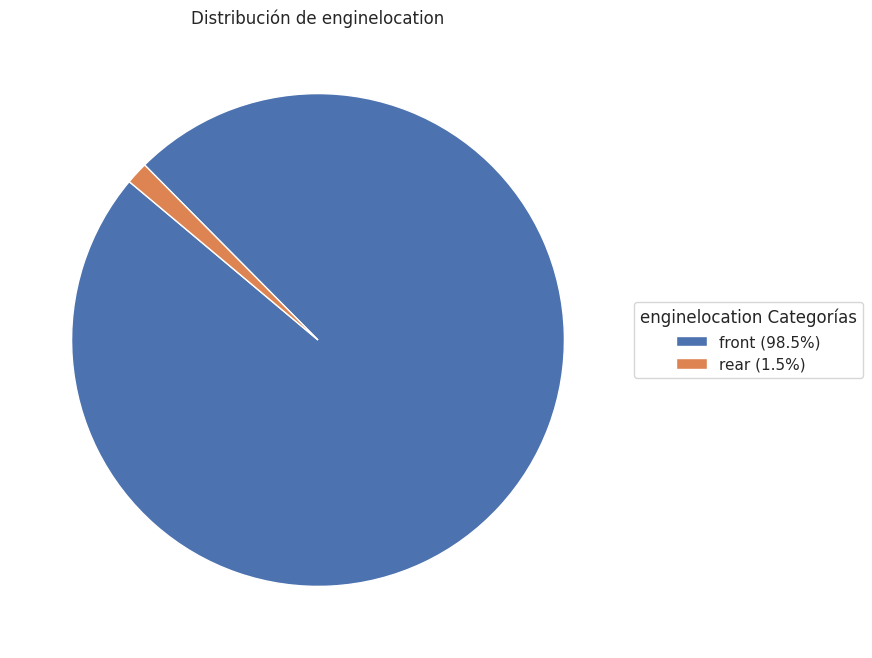

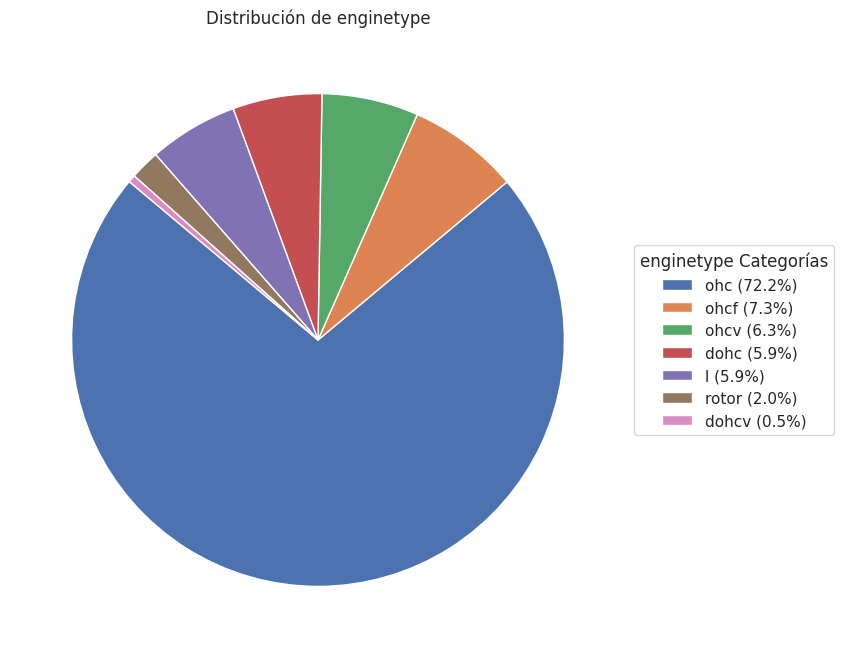

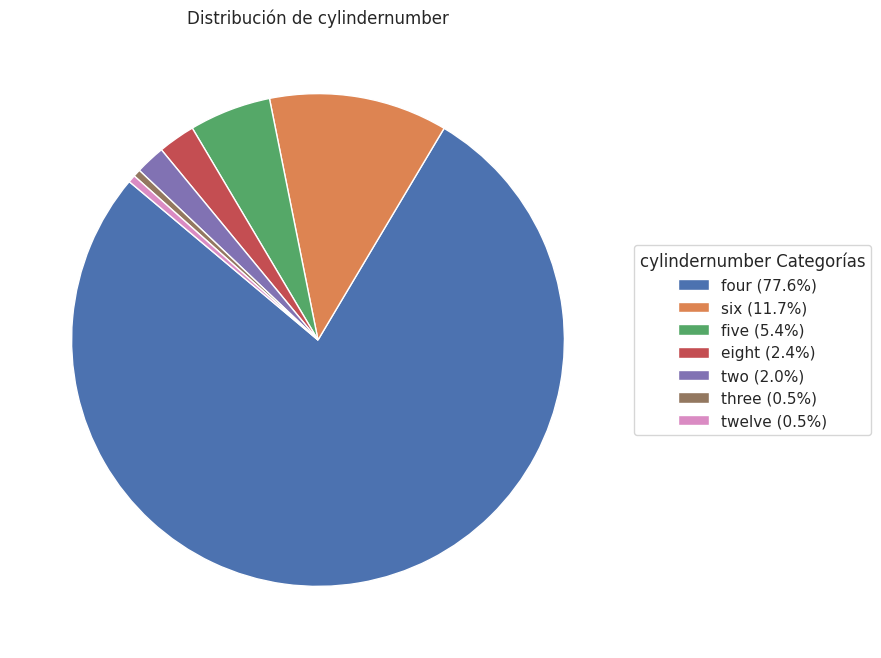

In [64]:
# Itera a traves de las columnas cualitativas
for variable in variables_cualitativas.columns:
    plt.figure(figsize=(8, 8))

    # Calcula la frecuencia de cada categoria
    data = variables_cualitativas[variable].value_counts()

    # Crea el diagrama de pastel utilizando Seaborn
    sns.set(style="whitegrid")
    pie_chart, _, autopcts = plt.pie(data, labels=None, autopct='', startangle=140, pctdistance=0.85)

    # Obtiene los nombres de las categorias directamente desde el indice del DataFrame
    category_names = data.index

    # Calcula los porcentajes manualmente y crea una lista de etiquetas para la leyenda
    total = sum(data)
    percentages = [(count / total) * 100 for count in data]
    legend_labels = [f'{category} ({percentage:.1f}%)' for category, percentage in zip(category_names, percentages)]

    # Agrega un titulo específico para cada gráfico
    plt.title(f'Distribución de {variable}')

    # Agrega una leyenda con los colores, etiquetas y porcentajes
    plt.legend(legend_labels, title=f'{variable} Categorías', loc='center left', bbox_to_anchor=(1, 0.5))

    # Muestra el grafico con un titulo y sin etiqueta en el eje y
    plt.ylabel('')

    plt.show()

**Observación:** Se corroboran bajo la visualización de estas gráficas de pastel que efectivamente hay valores predominantes en algunas variables.

##### 1.2.2.2 Análisis de colinealidad

Para analizar la colinealidad entre las variables cualitativas y **price** se grafican diagramas de caja y bigotes, mostrando los valores de cada variable contra el precio del los autos.

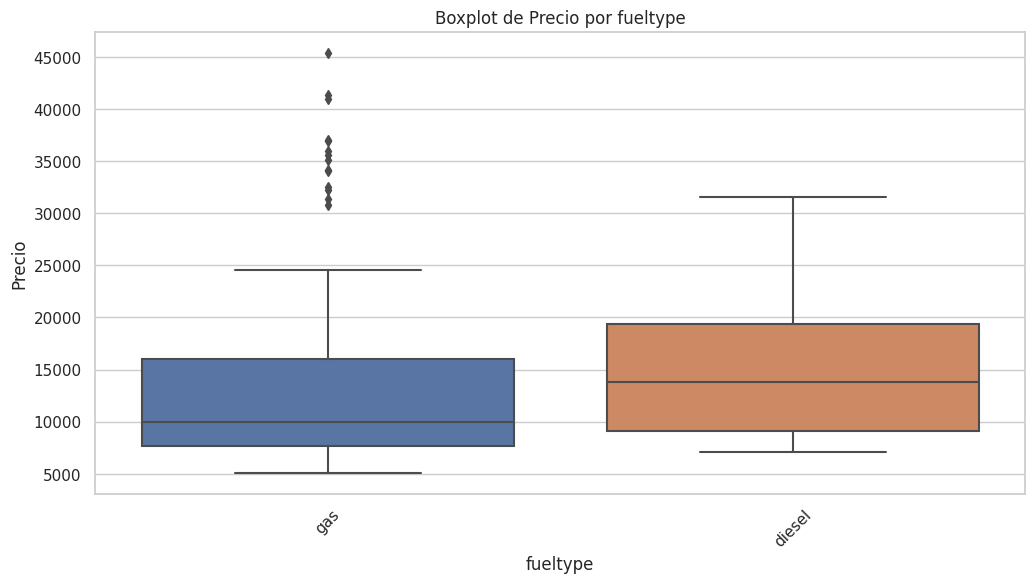

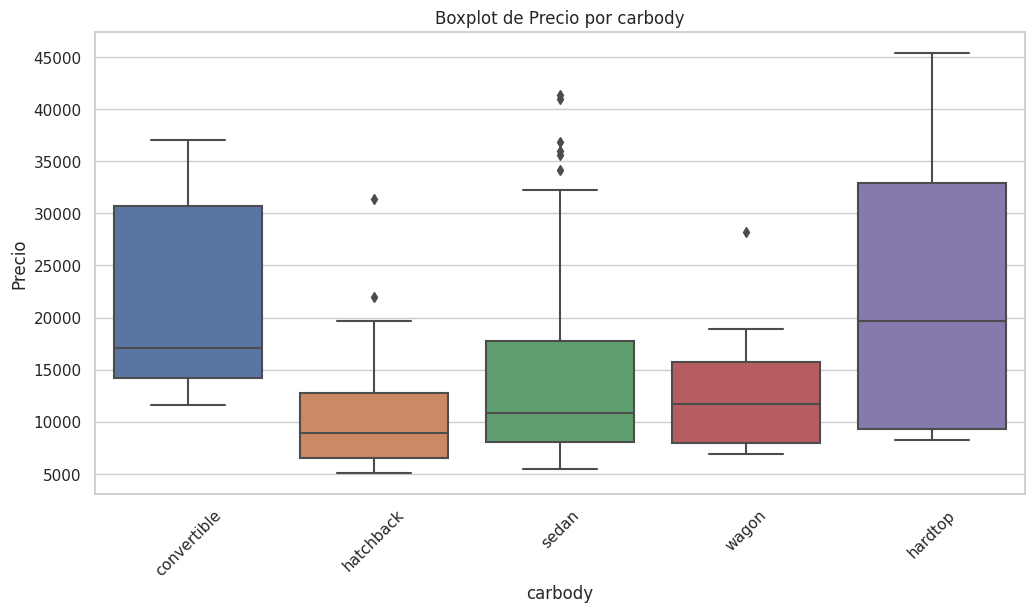

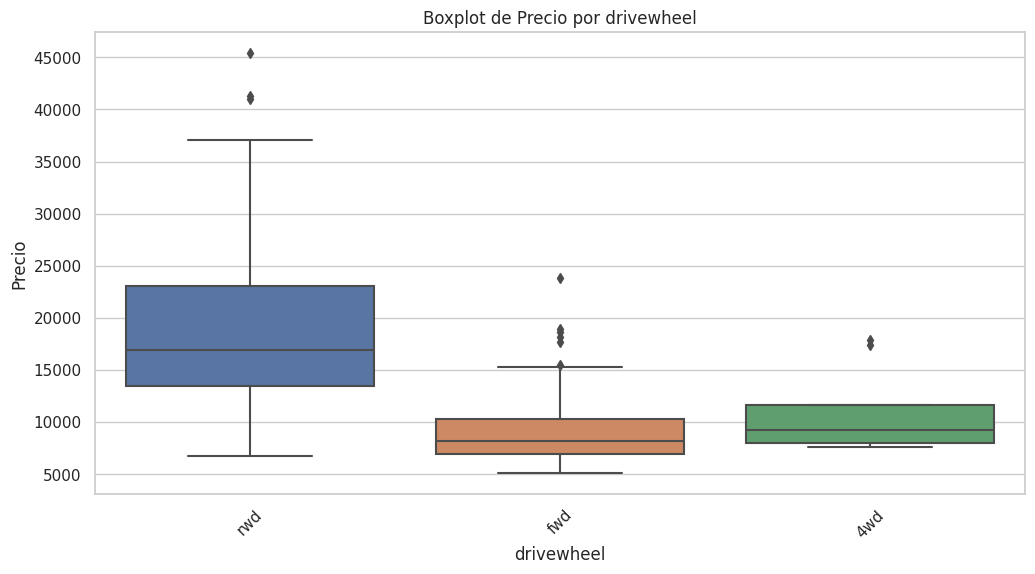

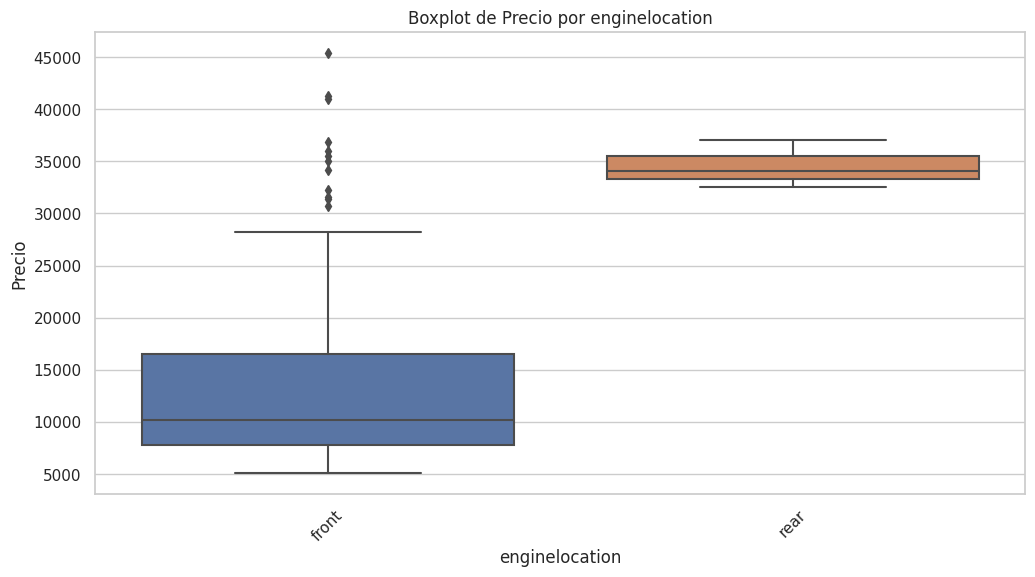

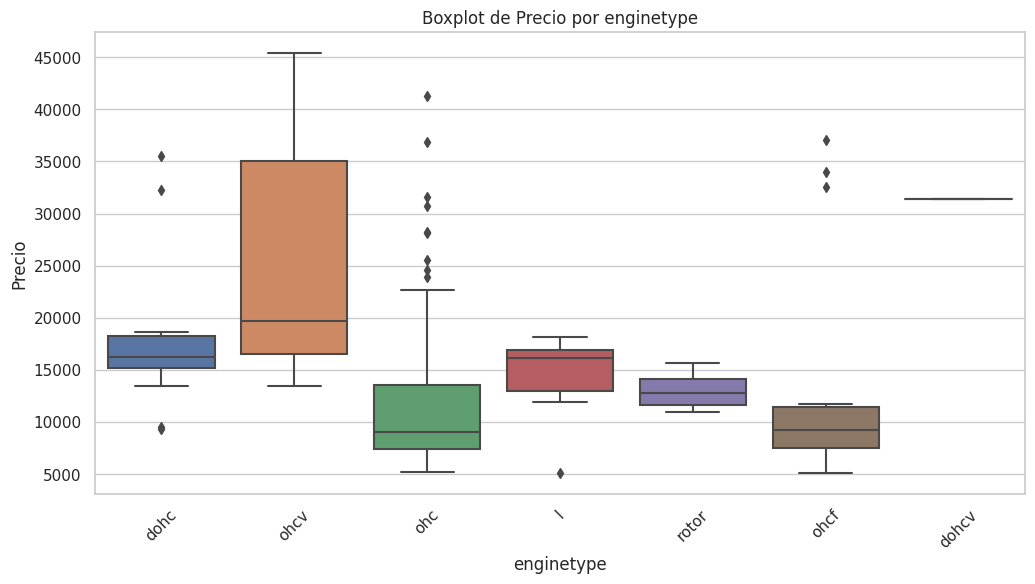

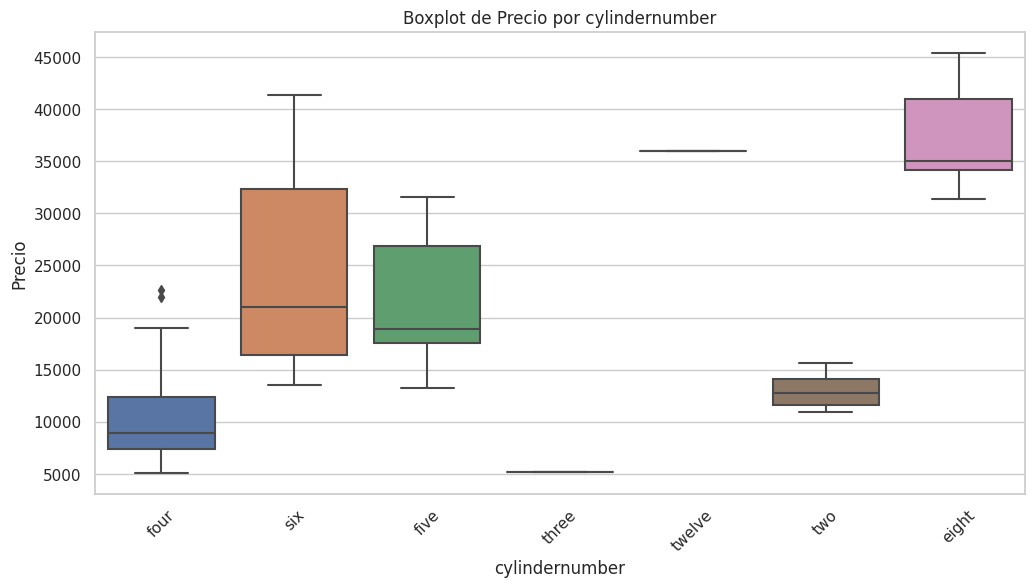

In [65]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Itera a través de las columnas de variables_cualitativas
for categoria in variables_cualitativas.columns:
    plt.figure(figsize=(12, 6))

    # Crea un boxplot para la variable categórica actual y la variable numérica (precio)
    sns.boxplot(x=variables_cualitativas[categoria], y=variables_cuantitativas['price'])

    plt.title(f'Boxplot de Precio por {categoria}')
    plt.xlabel(categoria)
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x

    # Guarda o muestra el gráfico, según sea necesario
    # plt.savefig(f'boxplot_{categoria}.png')
    plt.show()

**Observaciones:**

- Las variables **fueltype** y **enginelocation** se pueden descartar como las variables cantidatas que decriben mejor el precio debido a que cuentan con un desbalance en sus valores; es decir, a un nivel práctico, estas variables cuentan con un solo valor.
- La variable **carbody** tiene una buena distribución de valores. No obstante, en el diagrma de caja y bigotes se observa que las cajas de los valores se traslapan, lo cual entorpece la relación con la variable precio.
- Las variables **drivewheel**, **enginetype** y **cylindernumber** cuentan con una distribución un poco desbalanceada. Sin embargo, los diagrmas de cajas y bigotes no se traslapan tanto. Por lo tanto, estas tres variables pueden estar de alguna manera relacionadas al precio.

### 1.3 Identificación de problemas de calidad de datos

En este apartado sólo se identifica si las variables que se estan manejando cuentan con valores nulos. A continuación, se revisa si este es el caso.

In [66]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

**Observación:** Al parecer no hay variable que cuente con valores nulos, por lo que la calidad de los datos esta por el momenot asegurada.

### 1.4 Selección de variables

Qué variables son significativas para predecir el precio de un automóvil
Qué tan bien describen esas variables el precio de un automóvil

Con el propórito de responder a las dos preguntas planteadas en la problemática de esta entrega, se quiere construir un modelo de regresión lineal múltiple que describa el precio de los automóviles. Para realizar dicho modelo se necesitan variables que esten muy correlacionadas con el precio, pero muy poco correlacionadas entre ellas. Por lo tanto, las variables seleccionadas para constuir este tipo de modelos son: **enginesize**, **wheelbase**, **carheight**, **peakrmp**, **carbody** y **enginetype**.

## **2. Preparación de la base de datos**

En este apartado se pide manejar los datos categóricos por medio de la creación de variables dummy, manejo apropiado de datos atípicos, discretización de datos y escalamiento de datos. Por el momento no conviene hacer ninguno de estos cuatro procesos, ya que pertenecen a la construcción del modelo estadístico. Para continuar con la preparación de los datos se seleccionan las variables con las que se van a trabajar.

In [67]:
# Selecciona las variables indicadas previamente
autos_variables_df= autos_df[['enginesize', 'wheelbase', 'carheight', 'peakrpm', 'carbody', 'enginetype', 'price']]

# Exporta el DataFrame a un archivo CSV
autos_variables_df.to_csv('autos_variables.csv', index=False)